Nous allons nous intéresser dans ce cours à la matrice de covariance.

Avant d'aller plus loin, on génére notre nuage de points

In [137]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

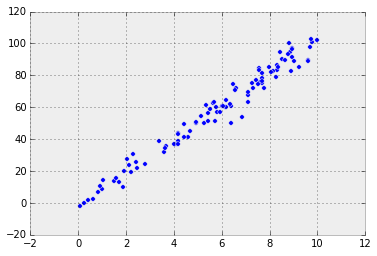

In [208]:
params  = (0,10)
var = 5
N = 100
x = 10*np.random.random(N)
y = params[0] + params[1]*x + var*np.random.normal(size=len(x))

plt.scatter(x,y)
plt.show()

Si nous disposons d'un jeu de données écrit sous la forme suivante :

$$X = \left[ \begin{array}{c} X_1 \\ X_2 \\ \vdots \end{array} \right]$$

La matrice de covariance est la matrice avec les entrées suivantes

$$ \sigma_{ij} = \frac {1}{N-1} \sum_{k=1}^N (X_{ki}-\bar X_i) (X_{kj} - \bar X_j)$$

A quoi correspondent les entrées diagonales ?
A quoi ressemble cette matrice dans notre cas ?

In [214]:
def covariance(x,y):
    return 1./(len(x)-1)*np.dot(x-x.mean(),y-y.mean()) 

def Matrice_covariance_2D(x,y):
    return np.array([[covariance(x,x), covariance(x,y)],[covariance(y,x), covariance(y,y)]])

M = Matrice_covariance_2D(x,y)
np.testing.assert_almost_equal(M, np.cov(x,y))

## Matrices et géométrie

Une matrice est une application linéaire. La matrice de covariance est une matrice symétrique qui peut être interprétée comme un endormorphisme sur un espace vectoriel, correspondant aux vecteurs des données.

Nous allons interpréter géométriquement cette matrice. Si vous n'avez pas d'intuition sur les matrices, vous pouvez allez sur le lien suivant : http://ncase.me/matrix/

### Matrice de rotation
Un exemple connu de matrice sont les matrices de rotation. Pour un vecteur à 2 dimension, elles s'écrivent sous la forme

$$ R(\theta) =  \begin{pmatrix}  \cos \theta & - \sin \theta \\ \sin \theta & \cos \theta \end{pmatrix} $$

Ces matrices sont orthogonales $R^T = R^{-1}$, de sorte qu'elles conservent la norme des vecteurs, et leur déterminant vaut 1.

In [211]:
u = np.array([1,0])

def rotation_matrix(theta):
    from math import cos, sin
    return np.array([[cos(theta), -1*sin(theta)],[sin(theta),cos(theta)]])

def rotate(v, theta):
    R = rotation_matrix(theta)
    return np.dot(R, v)

u_prime = rotate(u, 3.14159/2) #rotation de u de 90°

assert np.linalg.norm(u) == np.linalg.norm(u_prime)
assert np.linalg.det(rotation_matrix(3*14159/2)) == 1

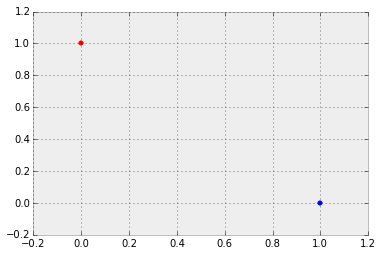

In [212]:
plt.scatter(u[0], u[1], color="blue")
plt.scatter(u_prime[0], u_prime[1], color="red") 
plt.show()

### Géométrie de la matrice de covariance

Afin de mieux comprendre cette matrice, nous allons d'abord générer un nuage de points totalement aléatoire.

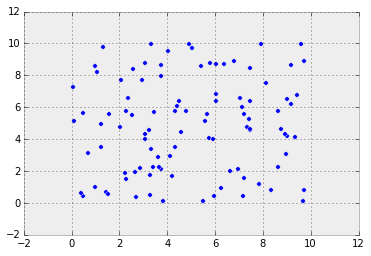

In [216]:
u = 10*np.random.random(N)
v = 10*np.random.random(N)

plt.scatter(u,v)
plt.show()

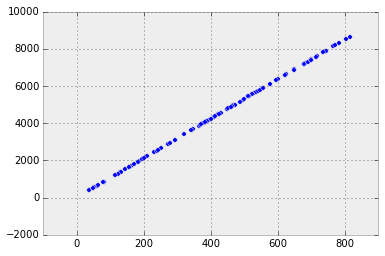

In [217]:
UV = np.dot(M, np.vstack((u,v)))
plt.scatter(UV[0], UV[1])
plt.show()

La matrice de correlation calculée depuis nos x et y initiaux à transformer u, v en les alignant sur un axe particulier, qui semble correspondre à la relation entre x et y.

## Valeurs propres et vecteurs propres

La matrice semble avoir une direction privilégiée. Que peut-on apprendre à partir des valeurs et vecteurs propres ?

In [219]:
eig_val, eig_vec = np.linalg.eig(M)

In [220]:
for i in range(2):
    print 'à la valeur propre', eig_val[i], 'correspond le vecteur', eig_vec[:,i]

à la valeur propre 0.204787559013 correspond le vecteur [-0.995594    0.09376882]
à la valeur propre 803.200017574 correspond le vecteur [-0.09376882 -0.995594  ]


Nous allons nous intéresser au vecteur dont la valeur propre est la plus élevée

In [221]:
principal_v = eig_vec[:,1]

In [222]:
principal_v[1]/principal_v[0]

10.617538329704502

Nous avons retrouver, simplement par l'analyse de la matrice de covariance, le coefficient de la droite qui explique le nuage de points initial x et y